<a href="https://colab.research.google.com/github/camilafaiza26/kelompok8_apm/blob/main/K_Nearest_Neighbor_Camila_Faiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#K-Nearest Neighbor
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [9]:
#Input Dataset
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [28]:
# #menentukan variabel independen (feature)
x = df.drop(["custcat"], axis=1)

# #menentukan variabel dependen (class)
y = df["custcat"]

In [29]:
# membagi dataset menjadi data train dan data test

# import package model selection dari Sklearn train_test_split untuk membagi data
from sklearn.model_selection import train_test_split

# membagi data dengan perbandingan data train dan data test 80%:20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
# lakukan standarisasi 
# (penskalaan pada data, karena range nilai data antar data feature terlalu jauh)

#mengaktifkan package sklearn.preprocessing untuk membantu melakukan standarisasi data
from sklearn.preprocessing import StandardScaler

#membuat objek standarisasi
standard_scaler = StandardScaler()

# fit digunakan untuk menghitung nilai rataan dan standar deviasi untuk digunakan saat proses scaling.
# transform untuk menerapkan nilai fit pada data
standard_scaler.fit(x_train)  # melakukan perhitungan nilai rataan dan standar deviasi pada data x_train

#menerapkan nilai rataan dan standar deviasi untuk penskalaan data x_train dan x_test
x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

In [31]:
# K-Nearest Neighbor(KNN) untuk classifier data

# import library
from sklearn.neighbors import KNeighborsClassifier

#membuat objek fungsi kalsifikasi untuk KNN
#mengklasifikasikan x training dan y training menjadi 4, sehingga terdapat syntax n_neighbors=4
knn = KNeighborsClassifier(n_neighbors=15)
#memasukkan data train pada objek fungsi klasifikasi KNN
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [32]:
# Menentukan prediksi KKN dari data test (data aktual)
y_predict = knn.predict(x_test)
y_predict

array([1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 4, 1, 1, 1,
       2, 4, 3, 3, 2, 4, 2, 4, 3, 3, 3, 4, 1, 4, 1, 3, 1, 1, 3, 1, 1, 1,
       3, 3, 3, 4, 1, 3, 4, 3, 3, 1, 1, 2, 4, 3, 4, 1, 1, 1, 1, 2, 1, 1,
       4, 3, 4, 2, 4, 1, 1, 1, 3, 1, 2, 2, 4, 3, 1, 3, 1, 1, 3, 4, 1, 4,
       3, 2, 1, 3, 1, 1, 1, 4, 1, 1, 3, 4, 2, 3, 1, 3, 3, 3, 1, 1, 1, 2,
       2, 4, 3, 1, 2, 1, 3, 4, 3, 4, 2, 2, 1, 3, 3, 2, 1, 1, 1, 2, 4, 3,
       1, 1, 2, 4, 1, 2, 1, 1, 1, 4, 2, 2, 1, 2, 3, 2, 3, 4, 2, 2, 1, 1,
       3, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 4, 2, 1, 1,
       2, 1])

In [33]:
# melihat akurasi data hasil prediksi dengan data aktual
# classification_report digunakan untuk membuat report ttg metriks kalsifikasi
# confusion_matrix merupakan matriks untuk menghitung akurasi dari nilai prediksi dan aktual
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #untuk perhitungan akurasi model

#menampilkan matriks hasil prediksi
print(confusion_matrix(y_test, y_predict))

#menampilkan report akurasi hasil prediksi
print(classification_report(y_test, y_predict))

#membuat summary akurasi model
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

[[30  5 12  6]
 [ 9 10  9 10]
 [28 15 14  3]
 [21 11  9  8]]
              precision    recall  f1-score   support

           1       0.34      0.57      0.43        53
           2       0.24      0.26      0.25        38
           3       0.32      0.23      0.27        60
           4       0.30      0.16      0.21        49

    accuracy                           0.31       200
   macro avg       0.30      0.31      0.29       200
weighted avg       0.30      0.31      0.29       200

Accuracy: 0.31


Text(0, 0.5, 'Mean Error')

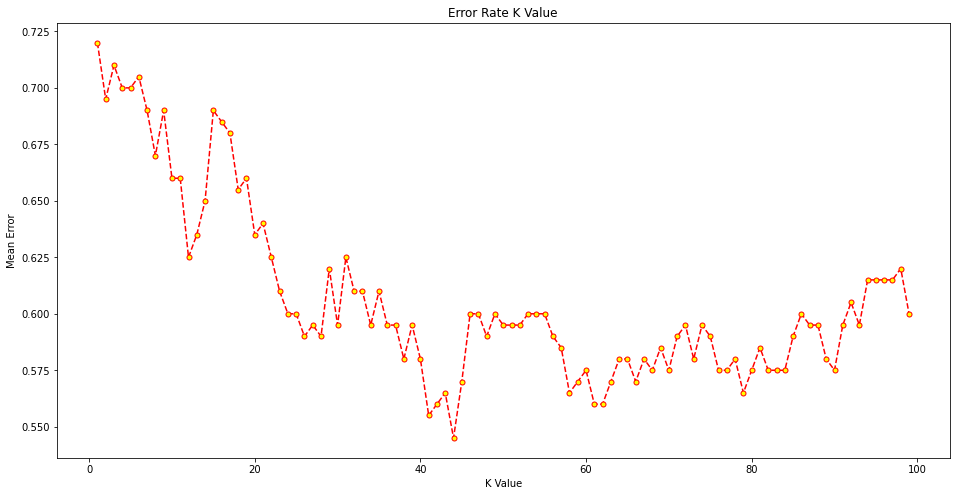

In [35]:
error = []
for i in range(1, 100): 
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(16, 8)) 
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=5)
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')